In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy
from random import sample, seed

In [11]:
Hubble_h = 0.73
BoxSize = ((62.5**3) * (2/8))**(1/3)
BoxSize1 = ((500**3) * (32/512))**(1/3)
dilute = 5000
sSFRcut = -11.0

In [12]:
directory = '../src/auxdata/trees/new-yield/'
directory1 = '../src/auxdata/trees/dust-growth/'
directory2 = '../src/auxdata/trees/dust/'
filename = 'model'
redshift = [0.000]
firstfile = 0
lastfile = 1

In [13]:
def galdtype():
	# Define the data-type for the public version of SAGE
	Galdesc_full = [
        ('SnapNum'                      , np.int32),
        ('Type'                         , np.int32),
        ('GalaxyIndex'                  , np.int64),
        ('CentralGalaxyIndex'           , np.int64),
        ('SAGEHaloIndex'                , np.int32),
        ('SAGETreeIndex'                , np.int32),
        ('SimulationHaloIndex'          , np.int64),
        ('mergeType'                    , np.int32),
        ('mergeIntoID'                  , np.int32),
        ('mergeIntoSnapNum'             , np.int32),
        ('dT'                           , np.float32),
        ('Pos'                          , (np.float32, 3)),
        ('Vel'                          , (np.float32, 3)),
        ('Spin'                         , (np.float32, 3)),
        ('Len'                          , np.int32),
        ('Mvir'                         , np.float32),
        ('CentralMvir'                  , np.float32),
        ('Rvir'                         , np.float32),
        ('Vvir'                         , np.float32),
        ('Vmax'                         , np.float32),
        ('VelDisp'                      , np.float32),
        ('ColdGas'                      , np.float32),
        ('StellarMass'                  , np.float32),
        ('BulgeMass'                    , np.float32),
        ('HotGas'                       , np.float32),
        ('EjectedMass'                  , np.float32),
        ('BlackHoleMass'                , np.float32),
        ('IntraClusterStars'            , np.float32),
        ('MetalsColdGas'                , np.float32),
        ('MetalsStellarMass'            , np.float32),
        ('MetalsBulgeMass'              , np.float32),
        ('MetalsHotGas'                 , np.float32),
        ('MetalsEjectedMass'            , np.float32),
        ('MetalsIntraClusterStars'      , np.float32),
        ('SfrDisk'                      , np.float32),
        ('SfrBulge'                     , np.float32),
        ('SfrDiskZ'                     , np.float32),
        ('SfrBulgeZ'                    , np.float32),
        ('DiskRadius'                   , np.float32),
        ('Cooling'                      , np.float32),
        ('Heating'                      , np.float32),
        ('QuasarModeBHaccretionMass'    , np.float32),
        ('TimeOfLastMajorMerger'         , np.float32),
        ('TimeOfLastMinorMerger'         , np.float32),
        ('OutflowRate'                  , np.float32),
        ('infallMvir'                   , np.float32),
        ('infallVvir'                   , np.float32),
        ('infallVmax'                   , np.float32)
        ]
	names = [Galdesc_full[i][0] for i in range(len(Galdesc_full))]
	formats = [Galdesc_full[i][1] for i in range(len(Galdesc_full))]
	Galdesc = np.dtype({'names':names, 'formats':formats}, align=True)
	return Galdesc

In [14]:
def galdtype1():
	# Define the data-type for the public version of SAGE
	Galdesc_full = [
        ('SnapNum'                      , np.int32),
        ('Type'                         , np.int32),
        ('GalaxyIndex'                  , np.int64),
        ('CentralGalaxyIndex'           , np.int64),
        ('SAGEHaloIndex'                , np.int32),
        ('SAGETreeIndex'                , np.int32),
        ('SimulationHaloIndex'          , np.int64),
        ('mergeType'                    , np.int32),
        ('mergeIntoID'                  , np.int32),
        ('mergeIntoSnapNum'             , np.int32),
        ('dT'                           , np.float32),
        ('Pos'                          , (np.float32, 3)),
        ('Vel'                          , (np.float32, 3)),
        ('Spin'                         , (np.float32, 3)),
        ('Len'                          , np.int32),
        ('Mvir'                         , np.float32),
        ('CentralMvir'                  , np.float32),
        ('Rvir'                         , np.float32),
        ('Vvir'                         , np.float32),
        ('Vmax'                         , np.float32),
        ('VelDisp'                      , np.float32),
        ('ColdGas'                      , np.float32),
        ('f_H2'                         , np.float32),
        ('f_HI'                         , np.float32),
        ('cf'                           , np.float32),
        ('Zp'                           , np.float32),
        ('Pressure'                     , np.float32),
        ('StellarMass'                  , np.float32),
        ('BulgeMass'                    , np.float32),
        ('HotGas'                       , np.float32),
        ('EjectedMass'                  , np.float32),
        ('BlackHoleMass'                , np.float32),
        ('IntraClusterStars'            , np.float32),
        ('MetalsColdGas'                , np.float32),
        ('MetalsStellarMass'            , np.float32),
        ('MetalsBulgeMass'              , np.float32),
        ('MetalsHotGas'                 , np.float32),
        ('MetalsEjectedMass'            , np.float32),
        ('MetalsIntraClusterStars'      , np.float32),
        ('Dust'                         , np.float32),
        ('SfrDisk'                      , np.float32),
        ('SfrBulge'                     , np.float32),
        ('SfrDiskZ'                     , np.float32),
        ('SfrBulgeZ'                    , np.float32),
        ('Sfr'                          , (np.float32, 64)),
        ('DiskRadius'                   , np.float32),
        ('Cooling'                      , np.float32),
        ('Heating'                      , np.float32),
        ('QuasarModeBHaccretionMass'    , np.float32),
        ('TimeOfLastMajorMerger'         , np.float32),
        ('TimeOfLastMinorMerger'         , np.float32),
        ('OutflowRate'                  , np.float32),
        ('infallMvir'                   , np.float32),
        ('infallVvir'                   , np.float32),
        ('infallVmax'                   , np.float32)
        ]
	names = [Galdesc_full[i][0] for i in range(len(Galdesc_full))]
	formats = [Galdesc_full[i][1] for i in range(len(Galdesc_full))]
	Galdesc = np.dtype({'names':names, 'formats':formats}, align=True)
	return Galdesc

In [15]:
def read_one_file(name, Galdesc):
    fin = open(name, 'rb')
    Ntrees = np.fromfile(fin,np.dtype(np.int32),1)[0]
    NtotGals = np.fromfile(fin,np.dtype(np.int32),1)[0]
    GalsPerTree = np.fromfile(fin, np.dtype((np.int32, Ntrees)),1)[0]
    G = np.fromfile(fin, Galdesc, NtotGals)
    G = G.view(recarray)
    return G

In [16]:
Galdesc = galdtype()
Galdesc1 = galdtype1()
Galdesc2 = galdtype1()

for i in range(len(redshift)):
    G_snap = []
    G_snap1 = []
    G_snap2 = []
    GalsTree = []
    
    for k in range(firstfile, lastfile+1):
        name = (directory+filename+'_z'+f'{redshift[i]:.3f}'+'_'+f'{k}')
        G = read_one_file(name, Galdesc1)
        G_snap.extend(G)
    for j in range(firstfile, lastfile+1):
        name1 = (directory1+filename+'_z'+f'{redshift[i]:.3f}'+'_'+f'{j}')
        #snapshot 0 = redshift 127, snapshot 63 = redshift 0
        G1 = read_one_file(name1, Galdesc1)
        G_snap1.extend(G1)
    for l in range(firstfile, lastfile+1):
        name2 = (directory2+filename+'_z'+f'{redshift[i]:.3f}'+'_'+f'{j}')
        #snapshot 0 = redshift 127, snapshot 63 = redshift 0
        G2 = read_one_file(name2, Galdesc1)
        G_snap2.extend(G2)
                       
    G_snap = np.array(G_snap)
    G_snap1 = np.array(G_snap1)
    G_snap = G_snap.view(recarray)
    G_snap1 = G_snap1.view(recarray)
    G_snap2 = np.array(G_snap2)
    G_snap2 = G_snap2.view(recarray)

In [17]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 80

# Plotting

## Stellar Mass Function

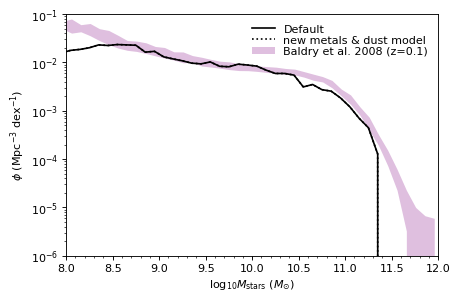

In [18]:
plt.figure()
ax = plt.subplot(111)

binwidth = 0.1

w = np.where(G_snap.StellarMass > 0.0)[0]
mass = np.log10(G_snap.StellarMass[w] * 1.e10 / Hubble_h)
w1 = np.where(G_snap1.StellarMass > 0.0)[0]
mass1 = np.log10(G_snap1.StellarMass[w1] * 1.e10 / Hubble_h)

mi = np.floor(min(mass)) - 2
#ma = np.floor(max(mass)) + 2
ma = 14
NB = int((ma - mi) / binwidth)

(counts, binedges) = np.histogram(mass, range=(mi, ma), bins=NB)
(counts1, binedges1) = np.histogram(mass1, range=(mi, ma), bins=NB)

# Set the x-axis values to be the centre of the bins
xaxeshisto = binedges[:-1] + 0.5 * binwidth
xaxeshisto1 = binedges1[:-1] + 0.5 * binwidth

plt.plot(xaxeshisto, counts / (BoxSize/Hubble_h)**3 / binwidth, 'k-', label='Default')
plt.plot(xaxeshisto1, counts1/ (BoxSize/Hubble_h)**3 / binwidth, 'k:', label='new metals & dust model')

# Baldry+ 2008 modified data used for the MCMC fitting
Baldry = np.array([
            [7.05, 1.3531e-01, 6.0741e-02],
            [7.15, 1.3474e-01, 6.0109e-02],
            [7.25, 2.0971e-01, 7.7965e-02],
            [7.35, 1.7161e-01, 3.1841e-02],
            [7.45, 2.1648e-01, 5.7832e-02],
            [7.55, 2.1645e-01, 3.9988e-02],
            [7.65, 2.0837e-01, 4.8713e-02],
            [7.75, 2.0402e-01, 7.0061e-02],
            [7.85, 1.5536e-01, 3.9182e-02],
            [7.95, 1.5232e-01, 2.6824e-02],
            [8.05, 1.5067e-01, 4.8824e-02],
            [8.15, 1.3032e-01, 2.1892e-02],
            [8.25, 1.2545e-01, 3.5526e-02],
            [8.35, 9.8472e-02, 2.7181e-02],
            [8.45, 8.7194e-02, 2.8345e-02],
            [8.55, 7.0758e-02, 2.0808e-02],
            [8.65, 5.8190e-02, 1.3359e-02],
            [8.75, 5.6057e-02, 1.3512e-02],
            [8.85, 5.1380e-02, 1.2815e-02],
            [8.95, 4.4206e-02, 9.6866e-03],
            [9.05, 4.1149e-02, 1.0169e-02],
            [9.15, 3.4959e-02, 6.7898e-03],
            [9.25, 3.3111e-02, 8.3704e-03],
            [9.35, 3.0138e-02, 4.7741e-03],
            [9.45, 2.6692e-02, 5.5029e-03],
            [9.55, 2.4656e-02, 4.4359e-03],
            [9.65, 2.2885e-02, 3.7915e-03],
            [9.75, 2.1849e-02, 3.9812e-03],
            [9.85, 2.0383e-02, 3.2930e-03],
            [9.95, 1.9929e-02, 2.9370e-03],
            [10.05, 1.8865e-02, 2.4624e-03],
            [10.15, 1.8136e-02, 2.5208e-03],
            [10.25, 1.7657e-02, 2.4217e-03],
            [10.35, 1.6616e-02, 2.2784e-03],
            [10.45, 1.6114e-02, 2.1783e-03],
            [10.55, 1.4366e-02, 1.8819e-03],
            [10.65, 1.2588e-02, 1.8249e-03],
            [10.75, 1.1372e-02, 1.4436e-03],
            [10.85, 9.1213e-03, 1.5816e-03],
            [10.95, 6.1125e-03, 9.6735e-04],
            [11.05, 4.3923e-03, 9.6254e-04],
            [11.15, 2.5463e-03, 5.0038e-04],
            [11.25, 1.4298e-03, 4.2816e-04],
            [11.35, 6.4867e-04, 1.6439e-04],
            [11.45, 2.8294e-04, 9.9799e-05],
            [11.55, 1.0617e-04, 4.9085e-05],
            [11.65, 3.2702e-05, 2.4546e-05],
            [11.75, 1.2571e-05, 1.2571e-05],
            [11.85, 8.4589e-06, 8.4589e-06],
            [11.95, 7.4764e-06, 7.4764e-06],
            ], dtype=np.float32)

Baldry_xval = np.log10(10 ** Baldry[:, 0]  /Hubble_h/Hubble_h)
Baldry_xval = Baldry_xval - 0.26  # convert back to Chabrier IMF
Baldry_yvalU = (Baldry[:, 1]+Baldry[:, 2]) * Hubble_h*Hubble_h*Hubble_h
Baldry_yvalL = (Baldry[:, 1]-Baldry[:, 2]) * Hubble_h*Hubble_h*Hubble_h

plt.fill_between(Baldry_xval, Baldry_yvalU, Baldry_yvalL, facecolor='purple', alpha=0.25, label='Baldry et al. 2008 (z=0.1)')

plt.yscale('log', nonposy='clip')
plt.axis([8.0, 12.0, 1.0e-6, 1.0e-1])

# Set the x-axis minor ticks
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))

plt.ylabel(r'$\phi\ (\mathrm{Mpc}^{-3}\ \mathrm{dex}^{-1})$')  # Set the y...
plt.xlabel(r'$\log_{10} M_{\mathrm{stars}}\ (M_{\odot})$')  # and the x-axis labels

leg = plt.legend(loc=0, numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')

#plt.savefig('plots/SMF-dust.png')
plt.show()

In [40]:
HI_rr, Z_rr, H2_rr, atomic_rr, logdust_rr, logstar_rr = np.loadtxt('remy-ruyer.master.dat', usecols=(1,3,4,6,8,9), unpack=True)
gas = atomic_rr * (HI_rr + H2_rr)
dust_rr = 10 ** logdust_rr
star_rr = 10 ** logstar_rr
w = np.where(gas > 0)[0]
Z_rr = Z_rr[w]
gas_rr = gas[w]
DTG_rr = np.log10(dust_rr[w] / gas[w])
logstar_rr = logstar_rr[w]
logdust_rr = logdust_rr[w]

In [45]:
#w = np.where(G_snap.Dust > 0)[0]
w1 = np.where(G_snap1.Dust > 0)[0]
min(G_snap1.Dust)

nan

## Dust - Stellar Mass

/Users/dtriani/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/dtriani/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


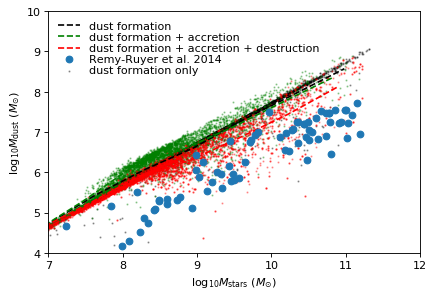

In [83]:
plt.figure()
ax = plt.subplot(111)

w = np.where((G_snap.StellarMass > 0) & (G_snap.Dust > 0))[0]
if(len(w) > dilute): w = sample(list(w), dilute)
mass = np.log10(G_snap.StellarMass[w] * 1.e10 / Hubble_h)
dust = np.log10(G_snap.Dust[w] * 1.e10 / Hubble_h)

total_bins = 20
bins = np.linspace(mass.min(), mass.max(), total_bins)
delta = bins[1]-bins[0]
idx = np.digitize(mass, bins)
tesmedian = [np.median(dust[idx==k]) for k in range(total_bins)]

plt.scatter(mass, dust, marker='o', s=1, c='k', alpha=0.3, label='dust formation only')
plt.plot(bins-delta/2, tesmedian, 'k--', label='dust formation')

w = np.where((G_snap1.StellarMass > 0) & (G_snap1.Dust > 0))[0]
if(len(w) > dilute): w = sample(list(w), dilute)
mass = np.log10(G_snap1.StellarMass[w] * 1.e10 / Hubble_h)
dust = np.log10(G_snap1.Dust[w] * 1.e10 / Hubble_h)

total_bins = 20
bins = np.linspace(mass.min(), mass.max(), total_bins)
delta = bins[1]-bins[0]
idx = np.digitize(mass, bins)
tesmedian = [np.median(dust[idx==k]) for k in range(total_bins)]

plt.scatter(mass, dust, marker='o', s=1, c='g', alpha=0.3)
plt.plot(bins-delta/2, tesmedian, 'g--', label='dust formation + accretion')


w = np.where((G_snap2.StellarMass > 0) & (G_snap2.Dust > 0))[0]
if(len(w) > dilute): w = sample(list(w), dilute)
mass = np.log10(G_snap2.StellarMass[w] * 1.e10 / Hubble_h)
dust = np.log10(G_snap2.Dust[w] * 1.e10 / Hubble_h)

total_bins = 20
bins = np.linspace(mass.min(), mass.max(), total_bins)
delta = bins[1]-bins[0]
idx = np.digitize(mass, bins)
tesmedian = [np.median(dust[idx==k]) for k in range(total_bins)]

plt.scatter(mass, dust, marker='o', s=1, c='r', alpha=0.3)
plt.plot(bins-delta/2, tesmedian, 'r--', label='dust formation + accretion + destruction')

plt.plot(logstar_rr, logdust_rr, 'o', label='Remy-Ruyer et al. 2014')
plt.xlim(7, 12)
plt.ylim(4, 10)
plt.xlabel(r'$\log_{10} M_{\mathrm{stars}}\ (M_{\odot})$')  # and the x-axis labels
plt.ylabel(r'$\log_{10} M_{\mathrm{dust}}\ (M_{\odot})$')  # and the x-axis labels

leg = plt.legend(loc=0, numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
plt.savefig('plots/dust-mass.png')

## DTG - Z

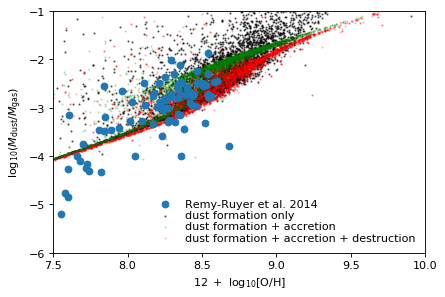

In [84]:
plt.figure()
ax = plt.subplot(111)

w = np.where((G_snap.MetalsColdGas > 0) & (G_snap.Dust > 0))[0]
if(len(w) > dilute): w = sample(list(w), dilute)

Z = np.log10((G_snap.MetalsColdGas[w] / G_snap.ColdGas[w]) / 0.02) + 9.0
DTG = np.log10(G_snap.Dust[w]/G_snap.ColdGas[w])

w = np.where((G_snap1.MetalsColdGas > 0) & (G_snap1.Dust > 0))[0]
if(len(w) > dilute): w = sample(list(w), dilute)

Z1 = np.log10((G_snap1.MetalsColdGas[w] / G_snap1.ColdGas[w]) / 0.02) + 9.0
DTG1 = np.log10(G_snap1.Dust[w]/G_snap1.ColdGas[w])

w = np.where((G_snap2.MetalsColdGas > 0) & (G_snap2.Dust > 0))[0]
if(len(w) > dilute): w = sample(list(w), dilute)

Z2 = np.log10((G_snap2.MetalsColdGas[w] / G_snap2.ColdGas[w]) / 0.02) + 9.0
DTG2 = np.log10(G_snap2.Dust[w]/G_snap2.ColdGas[w])

plt.scatter(Z, DTG, marker='o', s=1, c='k', alpha=0.5, label='dust formation only')
plt.scatter(Z1, DTG1, marker='o', s=1, c='g', alpha=0.2, label='dust formation + accretion')
plt.scatter(Z2, DTG2, marker='o', s=1, c='r', alpha=0.2, label='dust formation + accretion + destruction')
plt.plot(Z_rr, DTG_rr, 'o', label='Remy-Ruyer et al. 2014')
plt.xlim(7.5, 10)
plt.ylim(-6, -1)
plt.xlabel(r'$12\ +\ \log_{10}[\mathrm{O/H}]$')
plt.ylabel(r'$\log_{10} (M_{\mathrm{dust}} / M_{\mathrm{gas}})$')
#print(max(DTG))

leg = plt.legend(loc=0, numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
plt.savefig('plots/DTG.png')

## DTG - Mass

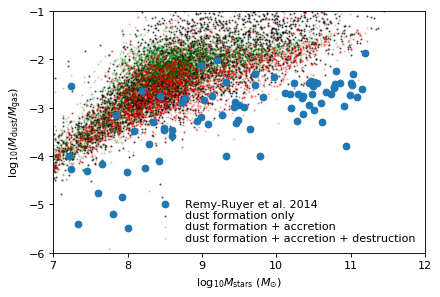

In [85]:
seed(2222)
plt.figure()
ax = plt.subplot(111)

w = np.where((G_snap.MetalsColdGas > 0) & (G_snap.Dust > 0))[0]
if(len(w) > dilute): w = sample(list(w), dilute)
mass = np.log10(G_snap.StellarMass[w] * 1.e10 / Hubble_h)
DTG = np.log10(G_snap.Dust[w]/G_snap1.ColdGas[w])

w = np.where((G_snap1.MetalsColdGas > 0) & (G_snap1.Dust > 0))[0]
if(len(w) > dilute): w = sample(list(w), dilute)
mass1 = np.log10(G_snap1.StellarMass[w] * 1.e10 / Hubble_h)
DTG1 = np.log10(G_snap1.Dust[w]/G_snap1.ColdGas[w])

w = np.where((G_snap2.MetalsColdGas > 0) & (G_snap2.Dust > 0))[0]
if(len(w) > dilute): w = sample(list(w), dilute)
mass2 = np.log10(G_snap2.StellarMass[w] * 1.e10 / Hubble_h)
DTG2 = np.log10(G_snap2.Dust[w]/G_snap2.ColdGas[w])


plt.scatter(mass, DTG, marker='o', s=1, c='k', alpha=0.5, label='dust formation only')
plt.scatter(mass1, DTG1, marker='o', s=1, c='g', alpha=0.2, label='dust formation + accretion')
plt.scatter(mass2, DTG2, marker='o', s=1, c='r', alpha=0.2, label='dust formation + accretion + destruction')
plt.plot(logstar_rr, DTG_rr, 'o' , label='Remy-Ruyer et al. 2014')

plt.xlim(7, 12)
plt.ylim(-6, -1)
plt.xlabel(r'$\log_{10} M_{\mathrm{stars}}\ (M_{\odot})$') 
plt.ylabel(r'$\log_{10} (M_{\mathrm{dust}} / M_{\mathrm{gas}})$')
#print(max(DTG))
leg = plt.legend(loc=0, numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
plt.savefig('plots/DTG-mass.png')

## Dust Mass Function

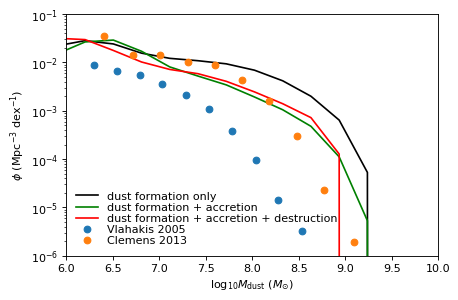

In [106]:
plt.figure()
ax = plt.subplot(111)

binwidth = 0.3

w = np.where(G_snap.Dust > 0.0)[0]
mass = np.log10(G_snap.Dust[w] * 1.e10 / Hubble_h)

w = np.where(G_snap1.Dust > 0.0)[0]
mass1 = np.log10(G_snap1.Dust[w] * 1.e10 / Hubble_h)

w = np.where(G_snap2.Dust > 0.0)[0]
mass2 = np.log10(G_snap2.Dust[w] * 1.e10 / Hubble_h)

mi = np.floor(min(mass2)) - 2
ma = np.floor(max(mass2)) + 2
NB = int((ma - mi) / binwidth)

(counts, binedges) = np.histogram(mass, range=(mi, ma), bins=NB)
(counts1, binedges1) = np.histogram(mass1, range=(mi, ma), bins=NB)
(counts2, binedges2) = np.histogram(mass2, range=(mi, ma), bins=NB)

# Set the x-axis values to be the centre of the bins
xaxeshisto = binedges[:-1] + 0.5 * binwidth
xaxeshisto1 = binedges1[:-1] + 0.5 * binwidth
xaxeshisto2 = binedges2[:-1] + 0.5 * binwidth

plt.plot(xaxeshisto, counts / (BoxSize/Hubble_h)**3 / binwidth, 'k-', label='dust formation only')
plt.plot(xaxeshisto1, counts1 / (BoxSize/Hubble_h)**3 / binwidth, 'g-', label='dust formation + accretion')
plt.plot(xaxeshisto2, counts2 / (BoxSize/Hubble_h)**3 / binwidth, 'r-', label='dust formation + accretion + destruction')

vlahakis_x = np.array([6.3, 6.543, 6.794, 7.03, 7.288, 7.536, 7.786, 8.042, 8.279, 8.535])
vlahakis_y = np.array([-2.059, -2.167, -2.261, -2.454, -2.672, -2.959, -3.423, -4.018, -4.855, -5.483])
plt.plot(vlahakis_x, 10**vlahakis_y, 'o', label='Vlahakis 2005')

clemens_x = np.array([6.404, 6.717, 7.010, 7.308, 7.599, 7.891, 8.184, 8.485, 8.776, 9.090])
clemens_y = np.array([-1.448, -1.853, -1.854, -1.980, -2.061, -2.352, -2.791, -3.531, -4.644, -5.724])
plt.plot(clemens_x, 10**clemens_y, 'o', label='Clemens 2013')

plt.yscale('log', nonposy='clip')
plt.axis([6.0, 10.0, 1.0e-6, 1.0e-1])

plt.ylabel(r'$\phi\ (\mathrm{Mpc}^{-3}\ \mathrm{dex}^{-1})$')  # Set the y...
plt.xlabel(r'$\log_{10} M_{\mathrm{dust}}\ (M_{\odot})$')  # and the x-axis labels

leg = plt.legend(loc=0, numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
plt.savefig('plots/DMF.png')

In [101]:
w = np.where(G_snap2.Dust > 0)[0]
mass2 = np.log10(G_snap2.Dust[w] * 1.e10 / Hubble_h)
max(mass2)

8.8537998

## Baryonic Mass Function

In [ ]:
plt.figure ()
ax = plt.subplot(111)

binwidth = 0.1

w = np.where(G_snap.StellarMass + G_snap.ColdGas > 0.0)[0]
mass = np.log10((G_snap.StellarMass[w] + G_snap.ColdGas[w]) * 1.0e10 / Hubble_h)
w1 = np.where(G_snap1.StellarMass + G_snap1.ColdGas > 0.0)[0]
mass1 = np.log10((G_snap1.StellarMass[w1] + G_snap1.ColdGas[w1]) * 1.0e10 / Hubble_h)

mi = np.floor(min(mass)) - 2
ma = np.floor(max(mass)) + 2
NB = int((ma - mi) / binwidth)

(counts, binedges) = np.histogram(mass, range=(mi, ma), bins=NB)
(counts1, binedges1) = np.histogram(mass1, range=(mi, ma), bins=NB)

# Set the x-axis values to be the centre of the bins
xaxeshisto = binedges[:-1] + 0.5 * binwidth
xaxeshisto1 = binedges1[:-1] + 0.5 * binwidth

plt.plot(xaxeshisto, counts / (BoxSize/Hubble_h)**3 / binwidth, 'k-', label='Default')
plt.plot(xaxeshisto1, counts1/ (BoxSize/Hubble_h)**3 / binwidth, 'k:', label='New yield')

# Bell et al. 2003 BMF (h=1.0 converted to h=0.73)
M = np.arange(7.0, 13.0, 0.01)
Mstar = np.log10(5.3*1.0e10 /Hubble_h/Hubble_h)
alpha = -1.21
phistar = 0.0108 * Hubble_h**3
xval = 10.0 ** (M-Mstar)
yval = np.log(10.) * phistar * xval ** (alpha+1) * np.exp(-xval)
plt.plot(np.log10(10.0**M /0.7 /1.8), yval, 'g--', lw=1.5, label='Bell et al. 2003')  # Plot the SMF

plt.yscale('log', nonposy='clip')
plt.axis([8.0, 12.5, 1.0e-6, 1.0e-1])

ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))

plt.ylabel(r'$\phi\ (\mathrm{Mpc}^{-3}\ \mathrm{dex}^{-1})$')  # Set the y...
plt.xlabel(r'$\log_{10}\ M_{\mathrm{bar}}\ (M_{\odot})$')  # and the x-axis labels

leg = plt.legend(loc=0, numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')

plt.savefig('plots/BMF-new-yield.png')
plt.show()

## Gas Mass Function

/Users/dtriani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/Users/dtriani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()
/Users/dtriani/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/Users/dtriani/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


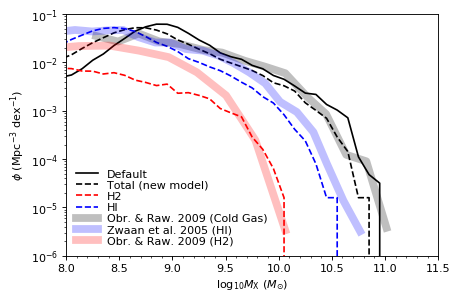

In [27]:
plt.figure ()
ax = plt.subplot(111)

binwidth = 0.1

w = np.where(G_snap.ColdGas > 0.0)[0]
mass = np.log10(G_snap.ColdGas[w] * 1.0e10 / Hubble_h)
w1 = np.where(G_snap1.ColdGas > 0.0)[0]
mass1 = np.log10(G_snap1.ColdGas[w1] * 1.0e10 / Hubble_h)
H2 = np.log10(G_snap1.f_H2[w1] * G_snap1.ColdGas[w1] * 1.0e10 / Hubble_h)
HI = np.log10(G_snap1.f_HI[w1] * G_snap1.ColdGas[w1] * 1.0e10 / Hubble_h)

mi = np.floor(min(mass1)) - 2
ma = np.floor(max(mass1)) + 2
NB = int((ma - mi) / binwidth)

(counts, binedges) = np.histogram(mass, range=(mi, ma), bins=NB)
(counts1, binedges1) = np.histogram(mass1, range=(mi, ma), bins=NB)
(counts2, binedges2) = np.histogram(H2, range=(mi, ma), bins=NB)
(counts3, binedges3) = np.histogram(HI, range=(mi, ma), bins=NB)

# Set the x-axis values to be the centre of the bins
xaxeshisto = binedges[:-1] + 0.5 * binwidth
xaxeshisto1 = binedges1[:-1] + 0.5 * binwidth
xaxeshisto2 = binedges2[:-1] + 0.5 * binwidth
xaxeshisto3 = binedges3[:-1] + 0.5 * binwidth

plt.plot(xaxeshisto, counts / (BoxSize/Hubble_h)**3 / binwidth, 'k-', label='Default')
plt.plot(xaxeshisto1, counts1/ (BoxSize/Hubble_h)**3 / binwidth, 'k--', label='Total (new model)')
plt.plot(xaxeshisto2, counts2/ (BoxSize/Hubble_h)**3 / binwidth, 'r--', label='H2')
plt.plot(xaxeshisto3, counts3/ (BoxSize/Hubble_h)**3 / binwidth, 'b--', label='HI')

Zwaan = np.array([[6.933,   -0.333],
            [7.057,   -0.490],
            [7.209,   -0.698],
            [7.365,   -0.667],
            [7.528,   -0.823],
            [7.647,   -0.958],
            [7.809,   -0.917],
            [7.971,   -0.948],
            [8.112,   -0.927],
            [8.263,   -0.917],
            [8.404,   -1.062],
            [8.566,   -1.177],
            [8.707,   -1.177],
            [8.853,   -1.312],
            [9.010,   -1.344],
            [9.161,   -1.448],
            [9.302,   -1.604],
            [9.448,   -1.792],
            [9.599,   -2.021],
            [9.740,   -2.406],
            [9.897,   -2.615],
            [10.053,  -3.031],
            [10.178,  -3.677],
            [10.335,  -4.448],
            [10.492,  -5.083]        ], dtype=np.float32)
        
ObrRaw = np.array([
            [7.300,   -1.104],
            [7.576,   -1.302],
            [7.847,   -1.250],
            [8.133,   -1.240],
            [8.409,   -1.344],
            [8.691,   -1.479],
            [8.956,   -1.792],
            [9.231,   -2.271],
            [9.507,   -3.198],
            [9.788,   -5.062 ]        ], dtype=np.float32)

ObrCold = np.array([
            [8.009,   -1.042],
            [8.215,   -1.156],
            [8.409,   -0.990],
            [8.604,   -1.156],
            [8.799,   -1.208],
            [9.020,   -1.333],
            [9.194,   -1.385],
            [9.404,   -1.552],
            [9.599,   -1.677],
            [9.788,   -1.812],
            [9.999,   -2.312],
            [10.172,  -2.656],
            [10.362,  -3.500],
            [10.551,  -3.635],
            [10.740,  -5.010]        ], dtype=np.float32)

ObrCold_xval = np.log10(10**(ObrCold[:, 0])  /Hubble_h/Hubble_h)
ObrCold_yval = (10**(ObrCold[:, 1]) * Hubble_h*Hubble_h*Hubble_h)
Zwaan_xval = np.log10(10**(Zwaan[:, 0]) /Hubble_h/Hubble_h)
Zwaan_yval = (10**(Zwaan[:, 1]) * Hubble_h*Hubble_h*Hubble_h)
ObrRaw_xval = np.log10(10**(ObrRaw[:, 0])  /Hubble_h/Hubble_h)
ObrRaw_yval = (10**(ObrRaw[:, 1]) * Hubble_h*Hubble_h*Hubble_h)

plt.plot(ObrCold_xval, ObrCold_yval, color='black', lw = 7, alpha=0.25, label='Obr. & Raw. 2009 (Cold Gas)')
plt.plot(Zwaan_xval, Zwaan_yval, color='blue', lw = 7, alpha=0.25, label='Zwaan et al. 2005 (HI)')
plt.plot(ObrRaw_xval, ObrRaw_yval, color='red', lw = 7, alpha=0.25, label='Obr. & Raw. 2009 (H2)')

plt.yscale('log', nonposy='clip')
plt.axis([8.0, 11.5, 1.0e-6, 1.0e-1])

ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))

plt.ylabel(r'$\phi\ (\mathrm{Mpc}^{-3}\ \mathrm{dex}^{-1})$')
plt.xlabel(r'$\log_{10} M_{\mathrm{X}}\ (M_{\odot})$')

leg = plt.legend(loc=0, numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
plt.savefig('plots/GMF-dust.png')    
plt.show()

## Baryonic Tully-Fisher

/Users/dtriani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/Users/dtriani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  
/Users/dtriani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
/Users/dtriani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in greater
  if sys.path[0] == '':


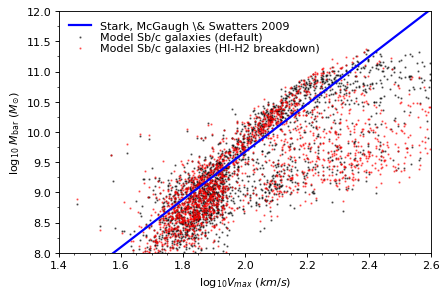

In [24]:
seed(2222)
plt.figure()
ax = plt.subplot(111)

w = np.where((G_snap.Type == 0) & (G_snap.StellarMass + G_snap.ColdGas > 0.0) &
            (G_snap.BulgeMass / G_snap.StellarMass > 0.1) & (G_snap.BulgeMass / G_snap.StellarMass > 0.5))[0]
if(len(w) > dilute): w = sample(list(w), dilute)
mass = np.log10((G_snap.ColdGas[w] + G_snap.StellarMass[w] )* 1.0e10 / Hubble_h)
vel = np.log10(G_snap.Vmax[w])

w1 = np.where((G_snap1.Type == 0) & (G_snap1.StellarMass + G_snap1.ColdGas > 0.0) &
            (G_snap1.BulgeMass / G_snap1.StellarMass > 0.1) & (G_snap1.BulgeMass / G_snap1.StellarMass > 0.5))[0]
if(len(w1) > dilute): w1 = sample(list(w1), dilute)
mass1 = np.log10((G_snap1.ColdGas[w1] + G_snap1.StellarMass[w1] )* 1.0e10 / Hubble_h)
vel1 = np.log10(G_snap1.Vmax[w1])

plt.scatter(vel, mass, marker='o', s=1, c='k', alpha=0.5, label='Model Sb/c galaxies (default)')
plt.scatter(vel1, mass1, marker='o', s=1, c='r', alpha=0.5, label='Model Sb/c galaxies (HI-H2 breakdown)')

# overplot Stark, McGaugh & Swatters 2009 (assumes h=0.75? ... what IMF?)
w = np.arange(0.5, 10.0, 0.5)
TF = 3.94*w + 1.79
plt.plot(w, TF, 'b-', lw=2.0, label='Stark, McGaugh \& Swatters 2009')

plt.ylabel(r'$\log_{10}\ M_{\mathrm{bar}}\ (M_{\odot})$')
plt.xlabel(r'$\log_{10}V_{max}\ (km/s)$')

# Set the x and y axis minor ticks
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.05))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.25))

plt.axis([1.4, 2.6, 8.0, 12.0])

leg = plt.legend(loc=0, numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
#plt.savefig('plots/GTF-millennium.png')    
plt.show()

## Specific SFR

In [ ]:
seed(2222)

plt.figure()
ax = plt.subplot(111)

w = np.where(G_snap.StellarMass > 0.01)[0]
if(len(w) > dilute): w = sample(list(w), dilute)
print(len(w))
mass = np.log10(G_snap.StellarMass[w] * 1.0e10 / Hubble_h)
sSFR = np.log10( (G_snap.SfrDisk[w] + G_snap.SfrBulge[w]) / (G_snap.StellarMass[w] * 1.0e10 / Hubble_h) )
plt.scatter(mass, sSFR, marker='o', s=1, c='k', alpha=0.5, label='Default')

w1 = np.where(G_snap1.StellarMass > 0.01)[0]
if(len(w1) > dilute): w1 = sample(list(w1), dilute)

mass1 = np.log10(G_snap1.StellarMass[w1] * 1.0e10 / Hubble_h)
sSFR1 = np.log10( (G_snap1.SfrDisk[w1] + G_snap1.SfrBulge[w1]) / (G_snap1.StellarMass[w1] * 1.0e10 / Hubble_h) )
plt.scatter(mass1, sSFR1, marker='o', s=1, c='r', alpha=0.5, label='HI-H2 Breakdown')

# overplot dividing line between SF and passive
w = np.arange(7.0, 13.0, 1.0)
plt.plot(w, w/w*sSFRcut, 'b:', lw=2.0)

plt.ylabel(r'$\log_{10}\ s\mathrm{SFR}\ (\mathrm{yr^{-1}})$')
plt.xlabel(r'$\log_{10} M_{\mathrm{stars}}\ (M_{\odot})$')

# Set the x and y axis minor ticks
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.05))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.25))

plt.axis([8.0, 12.0, -16.0, -8.0])

leg = plt.legend(loc=0, numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
#plt.savefig('plots/sSFR-millennium.png')    
plt.show()

## Gas Fraction

In [ ]:
seed(2222)

w = np.where((G_snap.Type == 0) & (G_snap.StellarMass + G_snap.ColdGas > 0.0) &
            (G_snap.BulgeMass / G_snap.StellarMass > 0.1) & (G_snap.BulgeMass / G_snap.StellarMass > 0.5))[0]
if(len(w) > dilute): w = sample(list(w), dilute)
mass = np.log10(G_snap.StellarMass[w]* 1.0e10 / Hubble_h)
fraction = G_snap.ColdGas[w] / (G_snap.StellarMass[w] + G_snap.ColdGas[w])

w1 = np.where((G_snap1.Type == 0) & (G_snap1.StellarMass + G_snap1.ColdGas > 0.0) &
            (G_snap1.BulgeMass / G_snap1.StellarMass > 0.1) & (G_snap1.BulgeMass / G_snap1.StellarMass > 0.5))[0]
if(len(w1) > dilute): w1 = sample(list(w1), dilute)
mass1 = np.log10(G_snap1.StellarMass[w1]* 1.0e10 / Hubble_h)
fraction1 = G_snap1.ColdGas[w1] / (G_snap1.StellarMass[w1] + G_snap1.ColdGas[w1])

plt.scatter(mass, fraction, marker='o', s=1, c='k', alpha=0.5, label='Sb/c galaxies (default)')
plt.scatter(mass1, fraction1, marker='o', s=1, c='r', alpha=0.5, label='Sb/c galaxies (HI-H2 breakdown)')

plt.ylabel(r'$\mathrm{Cold\ Mass\ /\ (Cold+Stellar\ Mass)}$')
plt.xlabel(r'$\log_{10} M_{\mathrm{stars}}\ (M_{\odot})$')

# Set the x and y axis minor ticks
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.05))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.25))

plt.axis([8.0, 12.0, 0.0, 1.0])

leg = plt.legend(loc=0, numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
#plt.savefig('plots/GasFraction-millennium.png')    
plt.show()

## Metallicity

/Users/dtriani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/dtriani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/dtriani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
/Users/dtriani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/Users/dtriani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


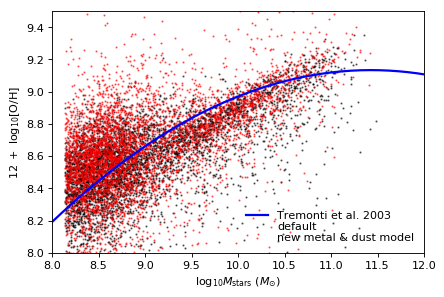

In [23]:
seed(2222)

w = np.where((G_snap.Type == 0) & ( G_snap.ColdGas / (G_snap.StellarMass + G_snap.ColdGas) > 0.0) &
            (G_snap.StellarMass > 0.01))[0]
if(len(w) > dilute): w = sample(list(w), dilute)
mass = np.log10(G_snap.StellarMass[w]* 1.0e10 / Hubble_h)
Z = np.log10((G_snap.MetalsColdGas[w] / G_snap.ColdGas[w]) / 0.02) + 9.0

w1 = np.where((G_snap1.Type == 0) & ( G_snap1.ColdGas / (G_snap1.StellarMass + G_snap1.ColdGas) > 0.0) &
            (G_snap1.StellarMass > 0.01))[0]
if(len(w1) > dilute): w1 = sample(list(w1), dilute)
mass1 = np.log10(G_snap1.StellarMass[w1]* 1.0e10 / Hubble_h)
Z1 = np.log10((G_snap1.MetalsColdGas[w1] / G_snap1.ColdGas[w1]) / 0.02) + 9.0

plt.scatter(mass, Z, marker='o', s=1, c='k', alpha=0.5, label='default')
plt.scatter(mass1, Z1, marker='o', s=1, c='r', alpha=0.5, label='new metal & dust model')

# overplot Tremonti et al. 2003 (h=0.7)
w = np.arange(7.0, 13.0, 0.1)
Zobs = -1.492 + 1.847*w - 0.08026*w*w
plt.plot(np.log10((10**w *1.5 /1.8)), Zobs, 'b-', lw=2.0, label='Tremonti et al. 2003')

plt.ylabel(r'$12\ +\ \log_{10}[\mathrm{O/H}]$')
plt.xlabel(r'$\log_{10} M_{\mathrm{stars}}\ (M_{\odot})$') 

# Set the x and y axis minor ticks
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.05))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.25))

plt.axis([8.0, 12.0, 8.0, 9.5])

leg = plt.legend(loc=0, numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')

plt.savefig('plots/Metallicity-dust.png')
plt.show()

## Blackhole Bulge Relationship

In [ ]:
seed(2222)

w = np.where((G_snap.BulgeMass > 0.01) & (G_snap.BlackHoleMass > 0.00001))[0]
if(len(w) > dilute): w = sample(list(w), dilute)
bh = np.log10(G_snap.BlackHoleMass[w] * 1.0e10 / Hubble_h)
bulge = np.log10(G_snap.BulgeMass[w] * 1.0e10 / Hubble_h)

w = np.where((G_snap1.BulgeMass > 0.01) & (G_snap1.BlackHoleMass > 0.00001))[0]
if(len(w1) > dilute): w1 = sample(list(w1), dilute)
bh1 = np.log10(G_snap1.BlackHoleMass[w1] * 1.0e10 / Hubble_h)
bulge1 = np.log10(G_snap1.BulgeMass[w1] * 1.0e10 / Hubble_h)

plt.scatter(bulge, bh, marker='o', s=1, c='k', alpha=0.5, label='default')
plt.scatter(bulge1, bh1, marker='o', s=1, c='r', alpha=0.5, label='HI-H2 breakdown')

# overplot Haring & Rix 2004
w = 10. ** np.arange(20)
BHdata = 10. ** (8.2 + 1.12 * np.log10(w / 1.0e11))
plt.plot(np.log10(w), np.log10(BHdata), 'b-', label="Haring \& Rix 2004")

plt.ylabel(r'$\log\ M_{\mathrm{BH}}\ (M_{\odot})$')  # Set the y...
plt.xlabel(r'$\log\ M_{\mathrm{bulge}}\ (M_{\odot})$')  # and the x-axis labels

# Set the x and y axis minor ticks
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.05))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.25))

plt.axis([8.0, 12.0, 6.0, 10.0])

leg = plt.legend(loc=0, numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')

#plt.savefig('plots/BBR-millennium.png')
plt.show()

## Quiescent Fraction

In [ ]:
seed(2222)

groupscale = 12.5

w = np.where(G_snap.StellarMass > 0.0)[0]
StellarMass = np.log10(G_snap.StellarMass[w] * 1.0e10 / Hubble_h)
CentralMvir = np.log10(G_snap.CentralMvir[w] * 1.0e10 / Hubble_h)
Type = G_snap.Type[w]
sSFR = (G_snap.SfrDisk[w] + G_snap.SfrBulge[w]) / (G_snap.StellarMass[w] * 1.0e10 / Hubble_h)

w1 = np.where(G_snap1.StellarMass > 0.0)[0]
StellarMass1 = np.log10(G_snap1.StellarMass[w1] * 1.0e10 / Hubble_h)
CentralMvir1 = np.log10(G_snap1.CentralMvir[w1] * 1.0e10 / Hubble_h)
Type1 = G_snap1.Type[w1]
sSFR1 = (G_snap1.SfrDisk[w1] + G_snap1.SfrBulge[w1]) / (G_snap1.StellarMass[w1] * 1.0e10 / Hubble_h)

MinRange = 9.5
MaxRange = 12.0
Interval = 0.1
Nbins = int((MaxRange-MinRange)/Interval)
Range = np.arange(MinRange, MaxRange, Interval)
        
Mass = []
Fraction = []
CentralFraction = []
SatelliteFraction = []
SatelliteFractionLo = []
SatelliteFractionHi = []

Mass1 = []
Fraction1 = []
CentralFraction1 = []
SatelliteFraction1 = []
SatelliteFractionLo1 = []
SatelliteFractionHi1 = []


for i in range(Nbins-1):
            
    w = np.where((StellarMass >= Range[i]) & (StellarMass < Range[i+1]))[0]
    if len(w) > 0:
        wQ = np.where((StellarMass >= Range[i]) & (StellarMass < Range[i+1]) & (sSFR < 10.0**sSFRcut))[0]
        Fraction.append(1.0*len(wQ) / len(w))
    else:
        Fraction.append(0.0)

    w = np.where((Type == 0) & (StellarMass >= Range[i]) & (StellarMass < Range[i+1]))[0]
    if len(w) > 0:
        wQ = np.where((Type == 0) & (StellarMass >= Range[i]) & (StellarMass < Range[i+1]) & (sSFR < 10.0**sSFRcut))[0]
        CentralFraction.append(1.0*len(wQ) / len(w))
    else:
        CentralFraction.append(0.0)

    w = np.where((Type == 1) & (StellarMass >= Range[i]) & (StellarMass < Range[i+1]))[0]
    if len(w) > 0:
        wQ = np.where((Type == 1) & (StellarMass >= Range[i]) & (StellarMass < Range[i+1]) & (sSFR < 10.0**sSFRcut))[0]
        SatelliteFraction.append(1.0*len(wQ) / len(w))
        wQ = np.where((Type == 1) & (StellarMass >= Range[i]) & (StellarMass < Range[i+1]) & (sSFR < 10.0**sSFRcut) & (CentralMvir < groupscale))[0]
        SatelliteFractionLo.append(1.0*len(wQ) / len(w))
        wQ = np.where((Type == 1) & (StellarMass >= Range[i]) & (StellarMass < Range[i+1]) & (sSFR < 10.0**sSFRcut) & (CentralMvir > groupscale))[0]
        SatelliteFractionHi.append(1.0*len(wQ) / len(w))                
    else:
        SatelliteFraction.append(0.0)
        SatelliteFractionLo.append(0.0)
        SatelliteFractionHi.append(0.0)
        
    w1 = np.where((StellarMass1 >= Range[i]) & (StellarMass1 < Range[i+1]))[0]
    if len(w1) > 0:
        wQ1 = np.where((StellarMass1 >= Range[i]) & (StellarMass1 < Range[i+1]) & (sSFR1 < 10.0**sSFRcut))[0]
        Fraction1.append(1.0*len(wQ1) / len(w1))
    else:
        Fraction1.append(0.0)

    w1 = np.where((Type1 == 0) & (StellarMass1 >= Range[i]) & (StellarMass1 < Range[i+1]))[0]
    if len(w1) > 0:
        wQ1 = np.where((Type1 == 0) & (StellarMass1 >= Range[i]) & (StellarMass1 < Range[i+1]) & (sSFR1 < 10.0**sSFRcut))[0]
        CentralFraction1.append(1.0*len(wQ1) / len(w1))
    else:
        CentralFraction1.append(0.0)

    w1 = np.where((Type1 == 1) & (StellarMass1 >= Range[i]) & (StellarMass1 < Range[i+1]))[0]
    if len(w1) > 0:
        wQ1 = np.where((Type1 == 1) & (StellarMass1 >= Range[i]) & (StellarMass1 < Range[i+1]) & (sSFR1 < 10.0**sSFRcut))[0]
        SatelliteFraction1.append(1.0*len(wQ1) / len(w1))
        wQ1 = np.where((Type1 == 1) & (StellarMass1 >= Range[i]) & (StellarMass1 < Range[i+1]) & (sSFR1 < 10.0**sSFRcut) & (CentralMvir1 < groupscale))[0]
        SatelliteFractionLo1.append(1.0*len(wQ1) / len(w1))
        wQ1 = np.where((Type1 == 1) & (StellarMass1 >= Range[i]) & (StellarMass1 < Range[i+1]) & (sSFR1 < 10.0**sSFRcut) & (CentralMvir1 > groupscale))[0]
        SatelliteFractionHi1.append(1.0*len(wQ1) / len(w1))                
    else:
        SatelliteFraction1.append(0.0)
        SatelliteFractionLo1.append(0.0)
        SatelliteFractionHi1.append(0.0)
                
    Mass.append((Range[i] + Range[i+1]) / 2.0)
    Mass1.append((Range[i] + Range[i+1]) / 2.0)                
    # print '  ', Mass[i], Fraction[i], CentralFraction[i], SatelliteFraction[i]
        
Mass = np.array(Mass)
Fraction = np.array(Fraction)
CentralFraction = np.array(CentralFraction)
SatelliteFraction = np.array(SatelliteFraction)
SatelliteFractionLo = np.array(SatelliteFractionLo)
SatelliteFractionHi = np.array(SatelliteFractionHi)

Mass1 = np.array(Mass1)
Fraction1 = np.array(Fraction1)
CentralFraction1 = np.array(CentralFraction1)
SatelliteFraction1 = np.array(SatelliteFraction1)
SatelliteFractionLo1 = np.array(SatelliteFractionLo1)
SatelliteFractionHi1 = np.array(SatelliteFractionHi1)


w = np.where(Fraction > 0)[0]
plt.plot(Mass[w], Fraction[w], c='k', label='All')
'''
w = np.where(CentralFraction > 0)[0]
plt.plot(Mass[w], CentralFraction[w], color='Blue', label='Centrals')

w = np.where(SatelliteFraction > 0)[0]
plt.plot(Mass[w], SatelliteFraction[w], color='Red', label='Satellites')

w = np.where(SatelliteFractionLo > 0)[0]
plt.plot(Mass[w], SatelliteFractionLo[w], 'r--', label='Satellites-Lo')

w = np.where(SatelliteFractionHi > 0)[0]
plt.plot(Mass[w], SatelliteFractionHi[w], 'r-.', label='Satellites-Hi')
'''
w = np.where(Fraction1 > 0)[0]
plt.plot(Mass1[w], Fraction1[w], c='k', lw = 0.5, label='HI-H2 breakdown')
'''
w = np.where(CentralFraction1 > 0)[0]
plt.plot(Mass1[w], CentralFraction1[w], color='Blue', lw=0.5)

w = np.where(SatelliteFraction1 > 0)[0]
plt.plot(Mass1[w], SatelliteFraction1[w], color='Red', lw=0.5)

w = np.where(SatelliteFractionLo1 > 0)[0]
plt.plot(Mass1[w], SatelliteFractionLo1[w], 'r--', lw=0.5)

w = np.where(SatelliteFractionHi1 > 0)[0]
plt.plot(Mass1[w], SatelliteFractionHi1[w], 'r-.', lw=0.5)
'''
plt.xlabel(r'$\log_{10} M_{\mathrm{stellar}}\ (M_{\odot})$')  # Set the x-axis label
plt.ylabel(r'$\mathrm{Quescient\ Fraction}$')  # Set the y-axis label
            
# Set the x and y axis minor ticks
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.05))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.25))
            
plt.axis([9.5, 11.2, 0.0, 1.05])

leg = plt.legend(loc='lower right')
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
#plt.savefig('plots/QuiescentFraction-millennium.png')

## Baryon Fraction

In [ ]:
seed(2222)

HaloMass = np.log10(G_snap.Mvir * 1.0e10 / Hubble_h)
Baryons = G_snap.StellarMass + G_snap.ColdGas + G_snap.HotGas + G_snap.EjectedMass + G_snap.IntraClusterStars + G_snap.BlackHoleMass

MeanCentralHaloMass = []
MeanBaryonFraction = []
MeanBaryonFractionU = []
MeanBaryonFractionL = []

MeanStars = []
MeanCold = []
MeanHot = []
MeanEjected = []
MeanICS = []
MeanBH = []

HaloMass1 = np.log10(G_snap1.Mvir * 1.0e10 / Hubble_h)
Baryons1 = G_snap1.StellarMass + G_snap1.ColdGas + G_snap1.HotGas + G_snap1.EjectedMass + G_snap1.IntraClusterStars + G_snap1.BlackHoleMass

MeanCentralHaloMass1 = []
MeanBaryonFraction1 = []
MeanBaryonFractionU1 = []
MeanBaryonFractionL1 = []

MeanStars1 = []
MeanCold1 = []
MeanHot1 = []
MeanEjected1 = []
MeanICS1 = []
MeanBH1 = []

MinHalo = 11.0
MaxHalo = 16.0
Interval = 0.1
Nbins = int((MaxHalo-MinHalo)/Interval)
HaloRange = np.arange(MinHalo, MaxHalo, Interval)

for i in range(Nbins-1):
    w1 = np.where((G_snap.Type == 0) & (HaloMass >= HaloRange[i]) & (HaloMass < HaloRange[i+1]))[0]
    HalosFound = len(w1)

    if HalosFound > 2:
        
        BaryonFraction = []
        CentralHaloMass = []
                
        Stars = []
        Cold = []
        Hot = []
        Ejected = []
        ICS = []
        BH = []
        
        for j in range(HalosFound):
                    
            w2 = np.where(G_snap.CentralGalaxyIndex == G_snap.CentralGalaxyIndex[w1[j]])[0]
            CentralAndSatellitesFound = len(w2)
                    
            if CentralAndSatellitesFound > 0:
                BaryonFraction.append(sum(Baryons[w2]) / G_snap.Mvir[w1[j]])
                CentralHaloMass.append(np.log10(G_snap.Mvir[w1[j]] * 1.0e10 / Hubble_h))

                Stars.append(sum(G_snap.StellarMass[w2]) / G_snap.Mvir[w1[j]])
                Cold.append(sum(G_snap.ColdGas[w2]) / G_snap.Mvir[w1[j]])
                Hot.append(sum(G_snap.HotGas[w2]) / G_snap.Mvir[w1[j]])
                Ejected.append(sum(G_snap.EjectedMass[w2]) / G_snap.Mvir[w1[j]])
                ICS.append(sum(G_snap.IntraClusterStars[w2]) / G_snap.Mvir[w1[j]])
                BH.append(sum(G_snap.BlackHoleMass[w2]) / G_snap.Mvir[w1[j]])                        
                                
        MeanCentralHaloMass.append(np.mean(CentralHaloMass))
        MeanBaryonFraction.append(np.mean(BaryonFraction))
        MeanBaryonFractionU.append(np.mean(BaryonFraction) + np.var(BaryonFraction))
        MeanBaryonFractionL.append(np.mean(BaryonFraction) - np.var(BaryonFraction))
                
        MeanStars.append(np.mean(Stars))
        MeanCold.append(np.mean(Cold))
        MeanHot.append(np.mean(Hot))
        MeanEjected.append(np.mean(Ejected))
        MeanICS.append(np.mean(ICS))
        MeanBH.append(np.mean(BH))

    w11 = np.where((G_snap1.Type == 0) & (HaloMass1 >= HaloRange[i]) & (HaloMass1 < HaloRange[i+1]))[0]
    HalosFound1 = len(w11)

    if HalosFound1 > 2:
        
        BaryonFraction1 = []
        CentralHaloMass1 = []
                
        Stars1 = []
        Cold1 = []
        Hot1 = []
        Ejected1 = []
        ICS1 = []
        BH1 = []
        
        for j in range(HalosFound1):
                    
            w21 = np.where(G_snap1.CentralGalaxyIndex == G_snap1.CentralGalaxyIndex[w11[j]])[0]
            CentralAndSatellitesFound1 = len(w21)
                    
            if CentralAndSatellitesFound1 > 0:
                BaryonFraction1.append(sum(Baryons1[w21]) / G_snap1.Mvir[w11[j]])
                CentralHaloMass1.append(np.log10(G_snap1.Mvir[w11[j]] * 1.0e10 / Hubble_h))

                Stars1.append(sum(G_snap1.StellarMass[w21]) / G_snap1.Mvir[w11[j]])
                Cold1.append(sum(G_snap1.ColdGas[w21]) / G_snap1.Mvir[w11[j]])
                Hot1.append(sum(G_snap1.HotGas[w21]) / G_snap1.Mvir[w11[j]])
                Ejected1.append(sum(G_snap1.EjectedMass[w21]) / G_snap1.Mvir[w11[j]])
                ICS1.append(sum(G_snap1.IntraClusterStars[w21]) / G_snap1.Mvir[w11[j]])
                BH1.append(sum(G_snap1.BlackHoleMass[w21]) / G_snap1.Mvir[w11[j]])                        
                                
        MeanCentralHaloMass1.append(np.mean(CentralHaloMass1))
        MeanBaryonFraction1.append(np.mean(BaryonFraction1))
        MeanBaryonFractionU1.append(np.mean(BaryonFraction1) + np.var(BaryonFraction1))
        MeanBaryonFractionL1.append(np.mean(BaryonFraction1) - np.var(BaryonFraction1))
                
        MeanStars1.append(np.mean(Stars1))
        MeanCold1.append(np.mean(Cold1))
        MeanHot1.append(np.mean(Hot1))
        MeanEjected1.append(np.mean(Ejected1))
        MeanICS1.append(np.mean(ICS1))
        MeanBH1.append(np.mean(BH1))

#plt.plot(MeanCentralHaloMass, MeanBaryonFraction, 'k-', label='TOTAL')#, color='purple', alpha=0.3)
#plt.fill_between(MeanCentralHaloMass, MeanBaryonFractionU, MeanBaryonFractionL, facecolor='pink', alpha=0.25, label='TOTAL')
plt.fill_between(MeanCentralHaloMass, MeanBaryonFractionU, MeanBaryonFractionL, 
    facecolor='pink', alpha=0.25)
       
plt.plot(MeanCentralHaloMass, MeanStars, 'k--', label='Stars')
plt.plot(MeanCentralHaloMass, MeanCold, label='Cold', color='blue')
plt.plot(MeanCentralHaloMass, MeanHot, label='Hot', color='red')
plt.plot(MeanCentralHaloMass, MeanEjected, label='Ejected', color='green')
plt.plot(MeanCentralHaloMass, MeanICS, label='ICS', color='purple')

plt.plot(MeanCentralHaloMass1, MeanBaryonFraction1, 'k-', lw=0.8, label="HI-H2 breakdown")#, color='purple', alpha=0.3)

plt.fill_between(MeanCentralHaloMass1, MeanBaryonFractionU1, MeanBaryonFractionL1, 
    facecolor='purple', alpha=0.25)
      
plt.plot(MeanCentralHaloMass, MeanStars1, 'k--', lw=0.5)
plt.plot(MeanCentralHaloMass, MeanCold1, lw=0.5, color='blue')
plt.plot(MeanCentralHaloMass, MeanHot1, lw=0.5, color='red')
plt.plot(MeanCentralHaloMass, MeanEjected1, lw=0.5, color='green')
plt.plot(MeanCentralHaloMass, MeanICS1, lw=0.5, color='purple')

plt.xlabel(r'$\mathrm{Central}\ \log_{10} M_{\mathrm{vir}}\ (M_{\odot})$')  # Set the x-axis label
plt.ylabel(r'$\mathrm{Baryon\ Fraction}$')  # Set the y-axis label
            
# Set the x and y axis minor ticks
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.05))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.25))
            
plt.axis([10.8, 15.0, 0.0, 0.23])
            
leg = plt.legend(bbox_to_anchor=[0.99, 0.6])
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
#plt.savefig('plots/BaryonFraction-KMT-1.png')

## Spin Distribution

In [ ]:
SpinParameter = np.sqrt(G_snap.Spin[:,0]*G_snap.Spin[:,0] + G_snap.Spin[:,1]*G_snap.Spin[:,1] + G_snap.Spin[:,2]*G_snap.Spin[:,2]) / (np.sqrt(2) * G_snap.Vvir * G_snap.Rvir);
mi = -0.02
ma = 0.5
binwidth = 0.01
NB = int((ma - mi) / binwidth)

(counts, binedges) = np.histogram(SpinParameter, range=(mi, ma), bins=NB)
xaxeshisto = binedges[:-1] + 0.5 * binwidth
plt.plot(xaxeshisto, counts, 'k-', label='simulation')

In [ ]:
ax0 = plt.subplot2grid((1,1), (0,0))
divider = make_axes_locatable(ax0)
ax1 = divider.append_axes("right", size="100%",sharey=ax0)
ax2 = divider.append_axes("right", size="100%",sharey=ax0)
plt.setp(ax1.get_yticklabels() + ax2.get_yticklabels(), visible=False)
w = np.where(G_snap1.ColdGas > 0)[0]
if(len(w) > dilute): w = sample(list(w), dilute)
    
cg = G_snap1.ColdGas[w] * 1.e10 /Hubble_h
area = np.pi * (3 * G_snap1.DiskRadius[w] * 1e6)**2
sfr = G_snap1.SfrDisk[w] + G_snap1.SfrBulge[w]
sigma_sfr = sfr/area
sigma_HI = G_snap1.f_HI[w] * cg/area
sigma_H2 = G_snap1.f_H2[w] * cg/area
sigma_g = cg/area

ax0.plot(sigma_HI, sigma_sfr, '.', markersize=1)
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_ylabel(r'$\dot{\Sigma}$ ($M_{\odot}{yr}^{-1}{kpc}^{-2}$)')
ax0.set_xlabel(r'$\Sigma_{HI}$ ($M_{\odot}{kpc}^{-2}$)')
#ax0.set_xlim(0.6, 150)
#ax0.set_ylim(2e-8, 160)

ax1.plot(sigma_H2, sigma_sfr, '.', markersize=1)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(r'$\Sigma_{H2}$ ($M_{\odot}{kpc}^{-2}$)')
#ax1.set_xlim(6e-6, 150)

ax2.plot(sigma_H2, sigma_g, '.', markersize=1)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel(r'$\Sigma_{g}$ ($M_{\odot}{kpc}^{-2}$)')
#ax2.set_xlim(6e-6, 150)

#plt.savefig('plots/gasdensity-millennium.png')

In [ ]:
import matplotlib.cm as cm
plt.figure()  # New figure

w = np.where((G_snap1.ColdGas > 0) & (G_snap1.MetalsColdGas > 0))[0]   
if(len(w) > dilute): w = sample(list(w), dilute)
area = np.pi * (3* G_snap1.DiskRadius[w] * 1e6 / Hubble_h)**2
cg = (G_snap1.ColdGas[w] * 1.e10 /Hubble_h) / area
print(cg)
f_H2 = G_snap1.f_H2[w]
metals = np.log10(G_snap1.MetalsColdGas[w] / G_snap1.ColdGas[w])
print(metals)
y = np.where(metals > -1.5)[0]

plt.scatter(cg/area, np.log10(f_H2), s=1, c=metals, cmap=cm.inferno)
cbar = plt.colorbar()
cbar.ax.set_ylabel('log Z')
plt.ylim(-2.5, 0)
plt.xlim(1e-9, 1e-4)
plt.xscale('log')
plt.xlabel(r'$\Sigma_g$ (M$_{\odot}{pc}^{-2})$')
plt.ylabel(r'log$_{10}$f$_{H2}$')
plt.savefig('plots/H2-gas-KMTb.png')
#plt.show()

In [ ]:
w = np.where(G_snap1.f_HI > 0)[0]
k = 1.38e-23
g = 1.989e43
cm = 3.08568e24
s = 3.08568e19

if(len(w) > dilute): w = sample(list(w), dilute)
fraction = G_snap1.f_H2[w]/G_snap1.f_HI[w]
pressure = (G_snap1.Pressure[w]*g/(cm*(s**2))/10)*1e-6/k
plt.plot(pressure, fraction, '.')
plt.ylim(0.05, 110)
plt.xlim(5e7, 1e12)
plt.xlabel(r'Pressure (Pa)')
plt.ylabel(r'f$_{H2}$/f$_{HI}$')
plt.xscale('log')
plt.yscale('log')
#plt.savefig('plots/pressure-millennium.png')

In [ ]:
import matplotlib.cm as cm
plt.figure()  # New figure


w = np.where((G_snap1.ColdGas > 0) & (G_snap1.MetalsColdGas > 0))[0]   
if(len(w) > dilute): w = sample(list(w), dilute)
area = np.pi * (3* G_snap1.DiskRadius[w] * 1e6 / Hubble_h)**2
cg = (G_snap1.ColdGas[w] * 1.e10 /Hubble_h) 
print(cg)
f_H2 = G_snap1.f_H2[w]

plt.scatter(cg, np.log10(f_H2), s=1)

plt.ylim(-8.0, 0)
plt.xlim(1e6, 1e11)
plt.xscale('log')
plt.xlabel(r'$M_g$ (M$_{\odot})$')
plt.ylabel(r'log f$_{H2}$')
plt.savefig('plots/full-KMT-1.png')
#plt.show()

In [ ]:
w = np.where((G_snap1.DiskRadius > 0) & (G_snap1.ColdGas > 0))[0]
if(len(w) > dilute): w = sample(list(w), dilute)
area = np.pi * (3* G_snap1.DiskRadius[w] * 1e6 / Hubble_h)**2
yy = (G_snap1.StellarMass[w] * 1.e10 / Hubble_h) 
xx = G_snap1.f_H2[w] * (G_snap1.ColdGas[w] * 1.e10 / Hubble_h) 
plt.scatter(xx, yy, s=1)
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$M_{\mathrm{*}}\ (M_{\odot})$')  # and the x-axis labels
plt.xlabel(r'$f_{H2} M_g (M_{\odot})$')
plt.ylim(1e7, 1e12)
plt.xlim(1e6, 1e11)
plt.savefig('plots/SFR-BR6.png')

In [ ]:
w = np.where((G_snap1.DiskRadius > 0) & (G_snap1.ColdGas > 0))[0]
if(len(w) > dilute): w = sample(list(w), dilute)
area = np.pi * (3* G_snap1.DiskRadius[w] * 1e6 / Hubble_h)**2
yy = (G_snap1.StellarMass[w] * 1.e10 / Hubble_h)
xx = (G_snap1.ColdGas[w] * 1.e10 / Hubble_h)
plt.plot(xx, yy, '.')
plt.xscale('log')
plt.yscale('log')

In [ ]:
seed(537675868)
A = list(np.arange(100))
print(sample(A, 10), sample(A, 10))